# Step 1 Import libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset

In [17]:
df = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')

In [6]:
df.head()

Country Code                                             Region  \
0          ABW                          Latin America & Caribbean   
1          AFE                                                NaN   
2          AFG  Middle East, North Africa, Afghanistan & Pakistan   
3          AFW                                                NaN   
4          AGO                                 Sub-Saharan Africa   

           IncomeGroup                                       SpecialNotes  \
0          High income                                                NaN   
1                  NaN  26 countries, stretching from the Red Sea in t...   
2           Low income  The reporting period for national accounts dat...   
3                  NaN  22 countries, stretching from the westernmost ...   
4  Lower middle income  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4                       Angola         NaN

In [5]:
# View data shape and sample
print(df.shape)
print(df[['Country Code', 'Region', 'IncomeGroup']].head())


(265, 6)
  Country Code                                             Region  \
0          ABW                          Latin America & Caribbean   
1          AFE                                                NaN   
2          AFG  Middle East, North Africa, Afghanistan & Pakistan   
3          AFW                                                NaN   
4          AGO                                 Sub-Saharan Africa   

           IncomeGroup  
0          High income  
1                  NaN  
2           Low income  
3                  NaN  
4  Lower middle income  


In [7]:
# checking for missing values
print(df['Region'].isnull().sum())


48


In [8]:
df_clean = df.dropna(subset=['Region'])


# Step 3: Count Countries per Region

In [9]:
region_counts = df_clean['Region'].value_counts()
print(region_counts)

Region
Europe & Central Asia                                58
Sub-Saharan Africa                                   48
Latin America & Caribbean                            42
East Asia & Pacific                                  37
Middle East, North Africa, Afghanistan & Pakistan    23
South Asia                                            6
North America                                         3
Name: count, dtype: int64


# Step 4: Plot Bar Chart

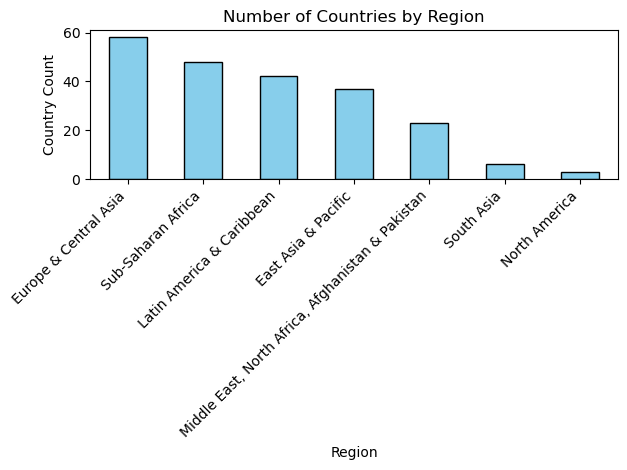

In [10]:
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Format chart
plt.title("Number of Countries by Region")
plt.xlabel("Region")
plt.ylabel("Country Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation
Each bar shows the number of countries in a specific Region.

Taller bars = regions with more countries in the dataset.

Useful for spotting regional coverage bias.

# Step 5: Plot Grouped Bar Chart

In [13]:
# Drop rows with missing Region or IncomeGroup
df_grouped = df.dropna(subset=['Region', 'IncomeGroup'])

# Create group count
grouped_counts = df_grouped.groupby(['Region', 'IncomeGroup']).size().unstack(fill_value=0)

print(grouped_counts)


IncomeGroup                                        High income  Low income  \
Region                                                                       
East Asia & Pacific                                         15           1   
Europe & Central Asia                                       40           0   
Latin America & Caribbean                                   19           0   
Middle East, North Africa, Afghanistan & Pakistan            8           3   
North America                                                3           0   
South Asia                                                   0           0   
Sub-Saharan Africa                                           1          21   

IncomeGroup                                        Lower middle income  \
Region                                                                   
East Asia & Pacific                                                 11   
Europe & Central Asia                                                3   
L

# Plotting Grouped Bar Chart

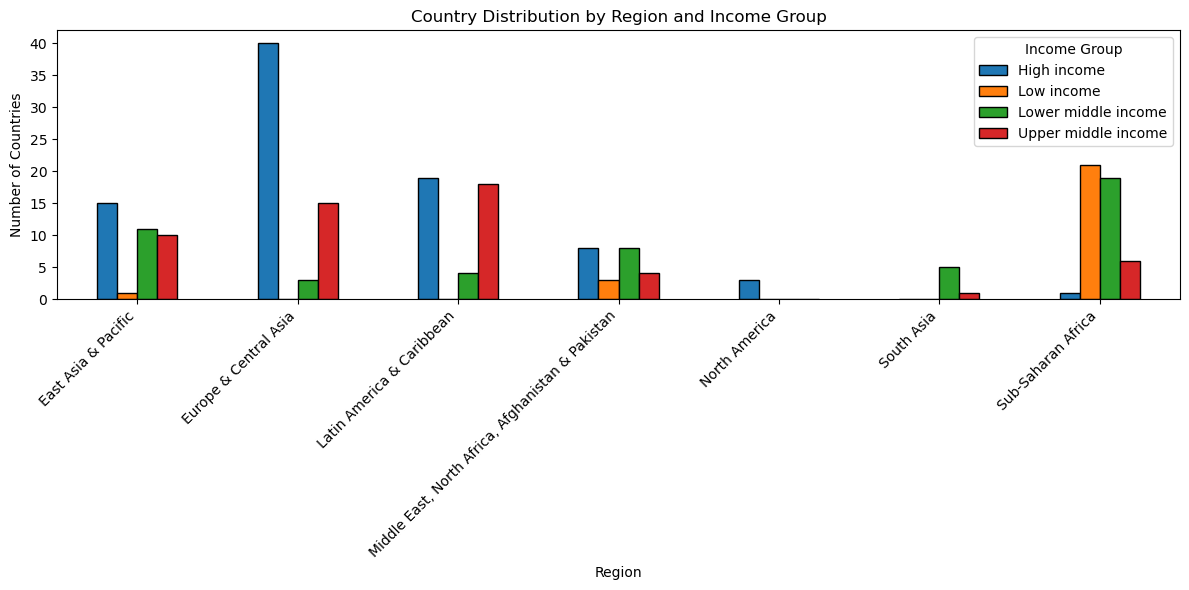

In [14]:
# Plot grouped bar chart
grouped_counts.plot(kind='bar', figsize=(12,6), edgecolor='black')

# Format
plt.title("Country Distribution by Region and Income Group")
plt.xlabel("Region")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

Interpretation
- Each group of bars = a Region

- Each color = an Income Group

- Allows you to:

- Compare how income levels vary across regions

- Spot regions with diverse vs. uniform income distribution

# Step 6 Pie Chart: Proportion of Countries by Income Group

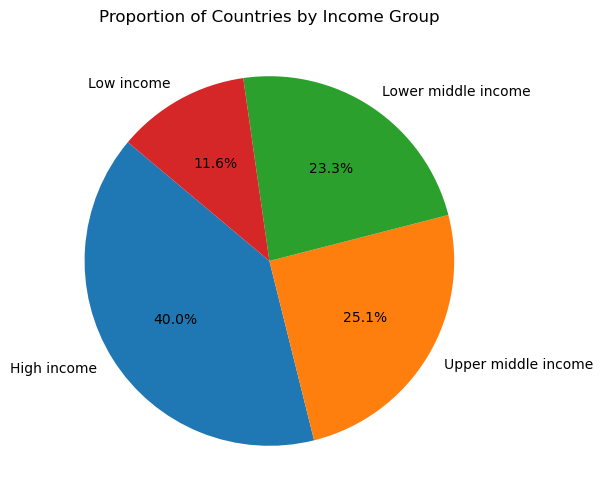

In [15]:
income_counts = df['IncomeGroup'].value_counts()

income_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title("Proportion of Countries by Income Group")
plt.ylabel('')  # Hide y-axis label
plt.show()


Interpretation:

Visualizes the percentage of countries in each income group.

Helps you quickly see which income categories dominate your dataset.

Example: If "High income" is 40%, your dataset may be high-income heavy.

 # Step 7 Stacked Bar Chart: Region vs IncomeGroup

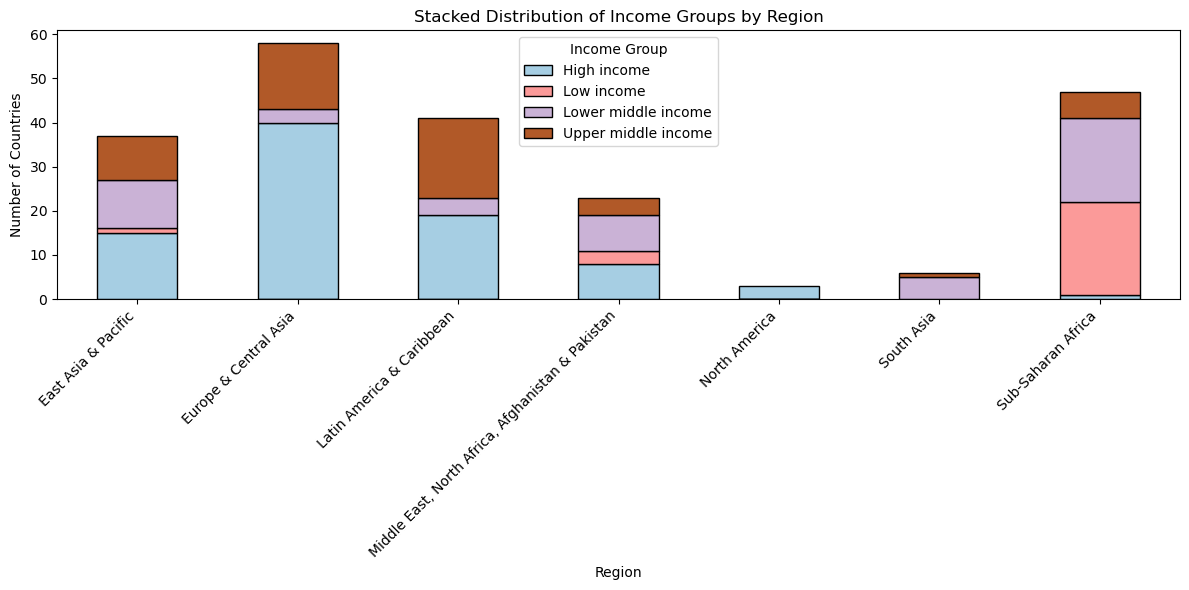

In [16]:
grouped_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired', edgecolor='black')

plt.title("Stacked Distribution of Income Groups by Region")
plt.xlabel("Region")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()


Interpretation:

Shows total countries per region as full bars.

Each segment in the bar shows an income group.

Great for seeing internal makeup of each region’s income distribution.

